<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:37px'>Introdução a Processamento de Linguagem Natural</h1>

<img src="imgs/head.png"/>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:20px'>O que é Processamento de Linguagem Natual?</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    O Processamento de Linguagem Natural (PLN) é a subárea da Inteligência Artificial (IA) que estuda a capacidade e as limitações de uma máquina em entender a linguagem dos seres humanos. 
    </p>
<div>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:20px'>Quais seus objetivos?</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    O objetivo do PLN é fornecer aos computadores a capacidade de entender e compor textos. 
    </p>
<div>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:20px'>Pode ser usada para?</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
<ul style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    <li>Reconhecer o contexto</li>
    <li>Fazer análises sintáticas, semânticas, léxicas e morfológicas</li>
    <li>Criar resumos</li>
    <li>Extrair informação</li>
    <li>Interpretar os sentidos</li>
    <li>Analisar sentimentos</li>
    <li>Aprender conceitos</li>
</ul>
</div>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:37px'>Análise de sentimentos em textos</h1> 

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <ol style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
        <li>Este minicurso terá como base os comentário da Amazon, Yelp e IMDb.</li>
        <li>Cada dataset contém registros, sendo 1 para reviews Positivos e 0 para Negativos.</li>
    </ol>
<div>

In [1]:
# Para analise de textos
import nltk
import spacy
from textblob import TextBlob

# Manipulação de dados
import numpy as np
import pandas as pd

# Criação de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Apredizado de Máquina e PLN
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Detalhes de visualização
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Explorando os dados</h1> 

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    O primeiro passo antes qualquer análise é primeiramente verificar quais as caracteristicas dos seus dados. O intuito é encontrar dados que podem ser importantes para a análise. 
    </p>
<div>

In [2]:
arquivos_dict = {'amazon': 'amazon_cells_labelled.txt',
                 'yelp': 'yelp_labelled.txt',
                 'imdb': 'imdb_labelled.txt'}

df_list = []

for fonte, arquivos in arquivos_dict.items():
    df = pd.read_csv(arquivos, names=['sentence', 'label'], sep='\t')
    df['fonte'] = fonte
    df_list.append(df)
    
df = pd.concat(df_list)
print('Formato do arquivo {}'.format(df.shape))

Formato do arquivo (19086, 3)


In [3]:
df.sample(10)

,sentence,label,fonte
10645,5 stars hands down.,NaN,amazon
6874,Great headset.,NaN,amazon
2082,Definitely a must return for this gal...,NaN,yelp
12214,It seems it's not worth ordering anything when...,NaN,amazon
3905,"It has great sound and is comfortable, reliabl...",NaN,amazon
3439,"The crust was cooked nicely, with some tasty p...",NaN,yelp
179,I guess I should have known that this place wo...,0.0,yelp
9097,This was a great gift and it was inexspensive.,NaN,amazon
1516,We started the meal with a traditional chips a...,NaN,yelp
4822,I use it with a RAZR and the voice commands ar...,NaN,amazon


<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Verificando a quantidades de amostras com valores nulos</h1> 

In [4]:
df.isnull().sum()

sentence        0
label       16338
fonte           0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.sample(10)

,sentence,label,fonte
93,"Again, no plot at all.",0.0,imdb
267,The only thing worse than Taylor's acting was ...,0.0,imdb
2078,T-Mobile has the best customer service anywhere.,1.0,amazon
323,Watching washing machine twirling around would...,0.0,imdb
2870,Kind of flops around.,0.0,amazon
2152,The reception has been generally good.,1.0,amazon
3596,We started with the tuna sashimi which was bro...,0.0,yelp
368,The visual effects were AWFUL.,0.0,imdb
948,"The burger... I got the ""Gold Standard"" a $17 ...",0.0,yelp
889,The bus boy on the other hand was so rude.,0.0,yelp


<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    Mesmo verificando os dados nulos com a função <strong>isnull()</strong>, em alguns casos os datasets de textos apresentam campos em branco. 
    </p>
<div>


In [6]:
brancos = []

for indice, senteca, label, fonte in df.itertuples():
    if(senteca.isspace()): # retorna um TRUE se houver apenas um caractere em branco
        brancos.append(i)
        
brancos

[]

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Vamos plotar um WordCloud com os reviews</h1> 

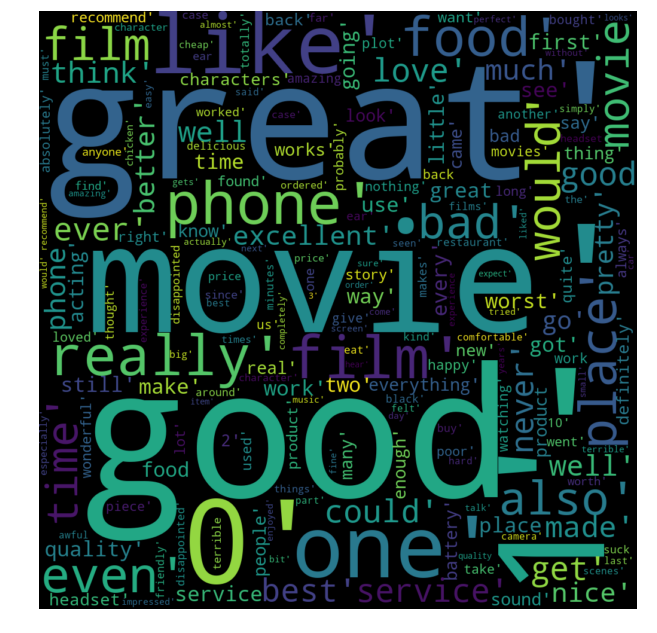

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwordsNltk = stopwords.words('english')

from wordcloud import WordCloud

words = []

for senteca in df.sentence:
    for palavra in senteca.lower().split():
        if(palavra not in stopwordsNltk):
            words.append(palavra)
            
words = str(words)

wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(words)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Antes de iniciarmos uma análise mais profunda e técnica, podemos procurar padrões “suspeitos” em nosso dataset</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
<ul style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    <li>Será que existe diferença de tamanho (caracteres) do comentário entre os datasets?</li>
    <li>Podemos verificar alguma correlação tamanho do review x sentimento?</li>
    <li>A forma de escrita do comentário (exemplos: educado, rude, gírias, etc…) tem influência no sentimento <strong>positivo</strong> ou <strong>negativo</strong>?</li>
</ul>
</div>
<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
   Vamos descobrir através da vizualização dos dados 
    </p>
<div>


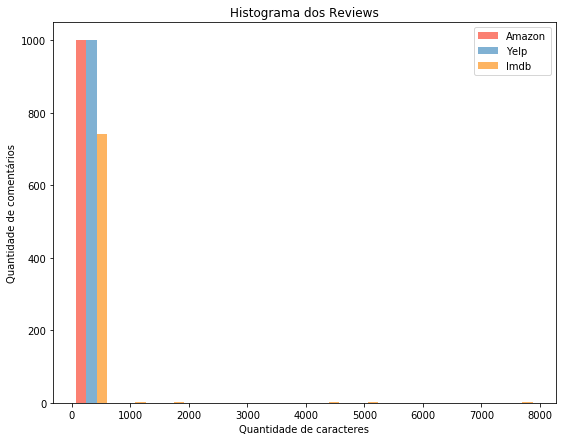

In [8]:
df['tamanho_texto'] = df['sentence'].apply(len)

x1 = list(df[df['fonte'] == 'amazon']['tamanho_texto'])
x2 = list(df[df['fonte'] == 'yelp']['tamanho_texto'])
x3 = list(df[df['fonte'] == 'imdb']['tamanho_texto'])

colors = ['#fb8072', '#80b1d3', '#fdb462']
names = ['Amazon', 'Yelp', 'Imdb']

plt.figure(figsize=(9,7))
plt.hist([x1, x2, x3], bins = int(180/15), normed=False, color = colors, label=names)

plt.xlabel('Quantidade de caracteres')
plt.ylabel('Quantidade de comentários')
plt.title('Histograma dos Reviews')
plt.legend();

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    Verificando rapidamente o histograma acima, não parece haver distinção entre os Datasets, apenas o Imdb apresenta alguns comentários mais longos que os demais. Mas será que isso influencia no sentimento do comentário: Positivo ou Negativo?
    </p>
</div>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    Vamos verificar...
    </p>
</div>

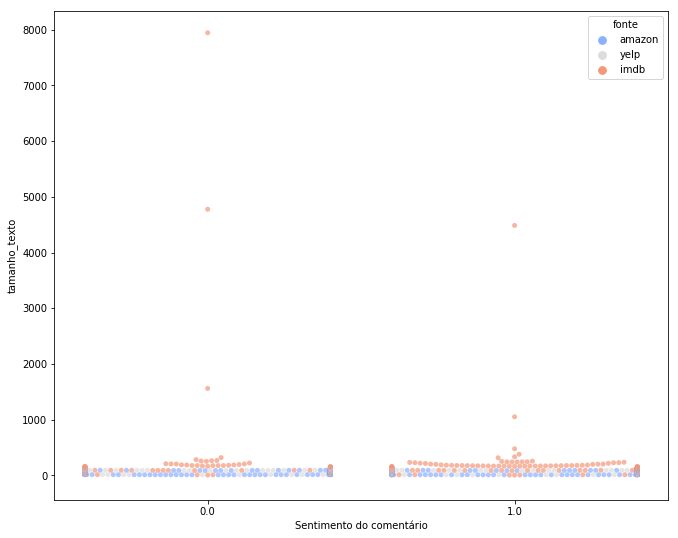

In [9]:
plt.figure(figsize=(11, 9))
sns.swarmplot(x='label', y='tamanho_texto', data=df, hue='fonte', alpha=0.7, palette='coolwarm')
plt.xlabel('Sentimento do comentário');

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    Conforme mostra nosso swarmplot, não há relação entre o tamanho do comentário com a probabilidade de ser Positivo ou Negativo.
    </p>
</div>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Vamos análisar gramaticamente os reviews</h1>

In [10]:
np.random.seed(100)

negativas = df[df['label'] == 0]
sample_neg = str(negativas.sentence.sample(2).values).split('\n')
positivas = df[df['label'] == 1]
sample_pos = str(positivas.sentence.sample(2).values).split('\n')
print(sample_neg)
print('\n')
print(sample_pos)

["['The real killer is the volume, and of course it breaking.'", " 'This may be the only bad film he ever made.  ']"]


["['Works well.' 'I had strawberry tea, which was good.']"]


In [11]:
nlp = spacy.load('en_core_web_sm')

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Review Negativa</h1>

In [12]:
doc = nlp(u"It was just too horrible.")
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{5}} {spacy.explain(token.tag)}')

It         PRON       PRP   None
was        AUX        VBD   None
just       ADV        RB    None
too        ADV        RB    None
horrible   ADJ        JJ    None
.          PUNCT      .     None


In [13]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 128})

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Review Positiva</h1>

In [14]:
doc1 = nlp(u"Nevertheless yet another wonderful film from the great master\'s stable.")
displacy.render(doc1, style='dep', jupyter=True, options={'distance': 85})

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Vamos começar efetivamente a análise de sentimento com dataset da Amazon!</h1>

<img src="./imgs/amazon.png"/>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
<ul style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    <li>A base de dados será dividida em 80/20, sendo respectivamente: Treino e Teste</li>
    <li>Utilizado Stemming — Refere-se a um processo heurístico não muito refinado que corta as extremidades das palavras na esperança de atingir esse objetivo corretamente na maior parte do tempo, e geralmente inclui a remoção de afixos derivados</li>
</ul>
</div>

In [15]:
amazon = df[df['fonte'] == 'amazon']
amazon = amazon[['sentence', 'label']]
print('Formato do Dataframe da Amazon {}'.format(amazon.shape))
amazon.head()

Formato do Dataframe da Amazon (1000, 2)


,sentence,label
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0


In [16]:
amazon['sentence'] = amazon['sentence'].str.replace('[^\w\s]','')

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Divisão da base de dados</h1>

In [17]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(amazon, test_size=0.2)

In [18]:
print('Shape dos dados de Treino {}'.format(treino.shape))
treino.label.value_counts(normalize=True)

Shape dos dados de Treino (800, 2)


1.0    0.50375
0.0    0.49625
Name: label, dtype: float64

In [19]:
print('Shape dos dados de Teste {}'.format(teste.shape))
teste.label.value_counts(normalize=True)

Shape dos dados de Teste (200, 2)


0.0    0.515
1.0    0.485
Name: label, dtype: float64

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Aplicando Stemmer</h1>

In [20]:
treino = [tuple(x) for x in treino.values]

In [21]:
def aplica_stemmer(texto):
    stemmer = nltk.stem.SnowballStemmer('english')
    
    frases_sem_stemming = []
    for (palavras, sentimento) in texto:
        com_stemming = [str(stemmer.stem(p)) for p in palavras.lower().split() if p not in stopwordsNltk]
        frases_sem_stemming.append((com_stemming, sentimento))
    return frases_sem_stemming

In [22]:
frases_com_stem_treinamento = aplica_stemmer(treino)

In [23]:
pd.DataFrame(frases_com_stem_treinamento, columns=['frase', 'sentimento']).sample(10)

,frase,sentimento
162,"[real, improv]",0.0
520,"[return, 8, hour, later]",0.0
188,"[excel, product, satisfi, purchas]",1.0
425,"[super, charg, use, small, hybrid, palmtopcame...",1.0
715,"[piec, junk, broke, phone, 2, day]",0.0
706,"[portabl, work]",1.0
329,"[disappoint, batteri]",0.0
451,"[never, know, push, hard, enough, right, numbe...",0.0
392,"[research, develop, divis, obvious, know, theyr]",1.0
728,"[absolut, problem, headset, link, 8530, blackb...",1.0


In [24]:
teste = [tuple(x) for x in teste.values]
frases_com_stem_teste = aplica_stemmer(teste)

In [25]:
def busca_palavras(frases):
    todas_palavras = []
    for (palavras, sentimento) in frases:
        todas_palavras.extend(palavras)
    return todas_palavras

In [26]:
palavras_treinamento = busca_palavras(frases_com_stem_treinamento)
palavras_teste = busca_palavras(frases_com_stem_teste)

In [27]:
print('Quantidade de palavras na base de treinamento {}'.format(pd.DataFrame(palavras_treinamento).count()))

Quantidade de palavras na base de treinamento 0    4299
dtype: int64


<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Listando palavras mais populares</h1>

In [28]:
def busca_frequencia(palavras):
    palavras = nltk.FreqDist(palavras)
    return palavras

In [29]:
frenquencia_treinamento = busca_frequencia(palavras_treinamento)
frenquencia_treinamento.most_common(10)

[('phone', 136),
 ('work', 88),
 ('great', 73),
 ('good', 65),
 ('use', 54),
 ('headset', 46),
 ('product', 45),
 ('qualiti', 43),
 ('batteri', 40),
 ('sound', 38)]

In [30]:
frenquencia_teste = busca_frequencia(palavras_teste)
frenquencia_teste.most_common(10)

[('phone', 37),
 ('work', 24),
 ('great', 24),
 ('use', 17),
 ('product', 11),
 ('well', 11),
 ('like', 10),
 ('good', 10),
 ('headset', 9),
 ('realli', 8)]

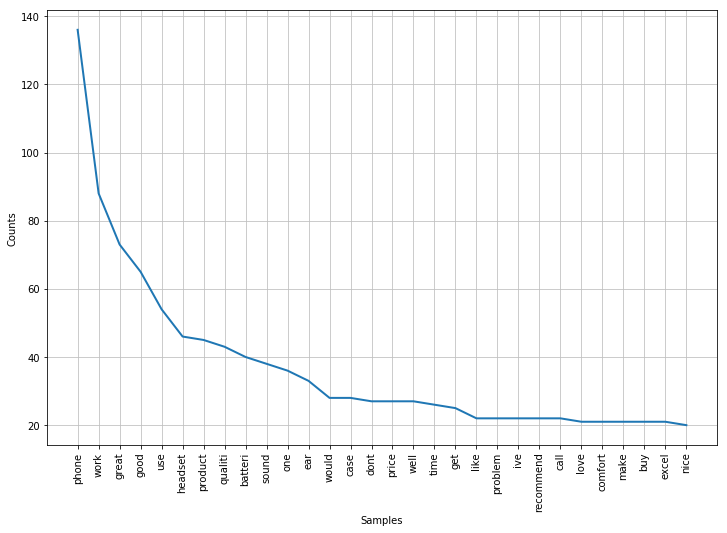

In [31]:
plt.figure(figsize=(12,8))
frenquencia_treinamento.plot(30, cumulative=False);

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Buscando palavras unicas</h1>

In [32]:
def busca_palavras_unicas(frequencia):
    freq = frequencia.keys()
    return freq

palavras_unicas_treinamento = busca_palavras_unicas(frenquencia_treinamento)
palavras_unicas_teste = busca_palavras_unicas(frenquencia_teste)

In [33]:
def extrator_palavras(documento):
    doc = set(documento)
    caracteristicas  = {}
    for palavras in palavras_unicas_treinamento:
        caracteristicas['%s' % palavras] = (palavras in doc)
    return caracteristicas

In [34]:
def extrator_palavras_teste(documento):
    doc = set(documento)
    caracteristicas  = {}
    for palavras in palavras_unicas_teste:
        caracteristicas['%s' % palavras] = (palavras in doc)
    return caracteristicas

In [35]:
base_completa_treinamento = nltk.classify.apply_features(extrator_palavras, frases_com_stem_treinamento)
base_completa_teste = nltk.classify.apply_features(extrator_palavras_teste, frases_com_stem_teste)

In [36]:
classificador = nltk.NaiveBayesClassifier.train(base_completa_treinamento)
print(classificador.labels())

[0.0, 1.0]


In [37]:
print('Acurácia: {}%'.format(nltk.classify.accuracy(classificador, base_completa_teste)))

Acurácia: 0.78%


<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Como melhorar o modelo?</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
<ul style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    <li>Aumentar a base de dados para o treino e teste, com isso teríamos um modelo mais robusto</li>
    <li>Testar outros algoritmos e hiperparâmetros</li>
    <li>Incluir novas StopWords…</li>
</ul>
</div>

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Verificando os erros do modelo</h1>

In [38]:
erros = []
for (frase, classe) in base_completa_teste:
    resultado = classificador.classify(frase)
    if resultado != classe:
        erros.append((classe, resultado, frase))

In [1]:
esperado = []
previsto = []
for (frase, classe) in base_completa_teste:
    resultado = classificador.classify(frase)
    previsto.append(resultado)
    esperado.append(classe)

    
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 16}    

plt.rc('font', **font)       
cm = confusion_matrix(esperado, previsto)
plt.figure(figsize=(12, 8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap='Blues')
className = ['Negativa','Positiva']
plt.title('Matriz de Confusão Amazon')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
tick_marks = np.arange(len(className))
plt.xticks(tick_marks, className, rotation=45)
plt.yticks(tick_marks, className);
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show();

NameError: name 'base_completa_teste' is not defined

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Probabilidade de cada classe</h1>

In [40]:
teste = 'i love the movie'
testeStemming = []
stemmer = nltk.stem.SnowballStemmer('english')
for (palavras_treinamento) in teste.split():
    comStem = [p for p in palavras_treinamento.split()]
    testeStemming.append(str(stemmer.stem(comStem[0])))
    
novo = extrator_palavras(testeStemming)
distribuicao = classificador.prob_classify(novo)

for classe in distribuicao.samples():
    print('%s: %f' % (classe, distribuicao.prob(classe)))
    if classe == 0:
        print('Probalidade de ser Negativa')
    else:
        print('Probalidade de ser Positiva')
        

0.0: 0.019410
Probalidade de ser Negativa
1.0: 0.980590
Probalidade de ser Positiva


<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Agora vamos realizar a análise de sentimentos da Yelp</h1>

<img style="width: 500px]; heigth: 500px" src="./imgs/yelp.png"/>

In [41]:
yelp = df[df['fonte'] == 'yelp']
yelp = yelp[['sentence', 'label']]
print('Formato do Dataframe da Yelp {}'.format(yelp.shape))
yelp.head()

Formato do Dataframe da Yelp (1000, 2)


,sentence,label
0,Wow... Loved this place.,1.0
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0
10,Stopped by during the late May bank holiday of...,1.0
11,The selection on the menu was great and so wer...,1.0


In [43]:
#criando uma coluna com os índices

yelp['index'] = yelp.index
yelp.head()

,sentence,label,index
0,Wow... Loved this place.,1.0,0
3,Crust is not good.,0.0,3
4,Not tasty and the texture was just nasty.,0.0,4
10,Stopped by during the late May bank holiday of...,1.0,10
11,The selection on the menu was great and so wer...,1.0,11


In [44]:
# Tratando os comentarios para tamanho minúsculo e removendo caracteres especiais e pontuações

yelp.columns = ['Sentence', 'Class', 'index']
yelp['Sentence'] = yelp['Sentence'].str.lower()

yelp['Sentece'] = yelp['Sentence'].str.replace('[^w\s]','')

#Também iremos remover  os numeros

yelp['Sentence'] = yelp['Sentence'].replace('\d', '', regex=True)
df_ = pd.DataFrame(columns=yelp.columns)

In [47]:
#remove stop words

for index, row in yelp.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    frase_filtrada = [p for p in word_tokens if not p in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class": row['Class'], "Sentence": " ".join(
    frase_filtrada[0:])}, ignore_index=True)

In [48]:
yelp = df_

# A divisão da base de Treino e teste também será de 80/20

X_train, X_test, y_train, y_test = train_test_split(yelp['Sentence'].values.astype('U'),
                                                   yelp['Class'].values.astype('int32'),
                                                   test_size=0.20, random_state=42)

In [49]:
classes = yelp['Class'].unique()
classes

array([1., 0.])

<h1 style='font-family:ubuntu; color:#1C1C1C; font-size:25px'>Utilizando TF-IDF</h1>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
No caso do TFIDF, o único pré-processamento de texto é remover a pontuação e diminuir as letras maiúsculas e minúsculas. Nós não temos que nos preocupar com as StopWords. O TFIDF é a junção do TF e IDF.
    </p>
</div>

<div style='padding:20px; border: 1px solid #E0FFFF; border-radius: 5px; background: #E0FFFF'>
<ul style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
    <li>O TFIDF é usado com sucesso pelos mecanismos de pesquisa, como o Google, como um fator de classificação para o conteúdo.</li>
    <li>A ideia é pesar os termos freqüentes e aumentar os mais raros</li>
</ul>
</div>

In [50]:
vectorizer = TfidfVectorizer()
counts = vectorizer.fit_transform(X_train)

In [56]:
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(penalty='elasticnet', random_state=42)
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
previsoes = classifier.predict(example_counts)

In [58]:
print(accuracy_score(y_test, previsoes))

0.775


<div style='padding:20px; border: 1px solid #FFDAB9; border-radius: 5px; background: #FFDAB9'>
    <p style='font-family:Ubuntu Mono; color:#1C1C1C; font-size:18px'>
Nossa acurácia para este modelo foi de 77,5% utilizando SGDClassifier.
    </p>
</div>    

In [6]:
# Caracteristicas das fontes

font = {
    'family' : 'normal',
    'weight' : 'bold',
    'size' : 22}

plt.rc('font', **font)

cm = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap='Greens')
classNames = ['Negativo','Positivo']
plt.title('Matriz de Confusão do Yelp')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Previsão da Classe')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN','TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+' = ' + str(cm[i][j]))

plt.show()



NameError: name 'plt' is not defined

<h3>
    
 Agora que já analisamos os datasets da Amazon e Yelp, temos a atividade com o Imdb

</h3>

* Obs: Nós poderíamos realizar uma única análise de sentimentos com o dataset consolidade que foi importado (concatenação) de todos os conjuntos, porém, o notebook ficará mais completo e didático se tratarmos de forma separada.. Mãos a obra!


![IMDB](imdb.png)

In [64]:
imdb = df[df['fonte'] == 'imdb']
imdb = imdb[['sentence', 'label']]
print('Formato do DataFrame do Imdb {}'.format(imdb.shape))
imdb.head()

Formato do DataFrame do Imdb (748, 2)


,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [66]:
imdb['sentence'] = imdb['sentence'].map(lambda x: x.lower())

#Criamos uma nova coluna e utilizamos a instancia do StopWords criada durante o tratamento da Amazon

imdb['sentence_sem_stop'] = imdb['sentence'].apply(lambda x: ' '.join(p for p in x.split() if p not in
                                                                     stopwordsNltk))

imdb.head()

,sentence,label,sentence_sem_stop
0,"a very, very, very slow-moving, aimless movie ...",0.0,"very, very, slow-moving, aimless movie distres..."
1,not sure who was more lost - the flat characte...,0.0,"sure lost - flat characters audience, nearly h..."
2,attempting artiness with black & white and cle...,0.0,attempting artiness black & white clever camer...
3,very little music or anything to speak of.,0.0,little music anything speak of.
4,the best scene in the movie was when gerardo i...,1.0,best scene movie gerardo trying find song keep...


In [68]:
def num_pos(frase_sem_stop):
    return TextBlob(frase_sem_stop).tags

In [70]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pires/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [72]:
sub_a = imdb['sentence_sem_stop'].apply(num_pos)
df_1 = pd.DataFrame(sub_a)

In [73]:
# Criando a nova coluna, cada linha em uma string,

# Onde cada palavra será unida com a sua pos correpondene e um único espaço irá separar as palavras.

df_1['col_pos'] = df_1['sentence_sem_stop'].map(lambda x:" ".join(["/".join(x) for x in x]))

In [74]:
imdb = pd.merge(imdb, df_1, left_index = True, right_index = True,)
imdb.head()

,sentence,label,sentence_sem_stop_x,sentence_sem_stop_y,col_pos
0,"a very, very, very slow-moving, aimless movie ...",0.0,"very, very, slow-moving, aimless movie distres...","[(very, RB), (very, RB), (slow-moving, NN), (a...",very/RB very/RB slow-moving/NN aimless/JJ movi...
1,not sure who was more lost - the flat characte...,0.0,"sure lost - flat characters audience, nearly h...","[(sure, NN), (lost, VBN), (flat, JJ), (charact...",sure/NN lost/VBN flat/JJ characters/NNS audien...
2,attempting artiness with black & white and cle...,0.0,attempting artiness black & white clever camer...,"[(attempting, VBG), (artiness, JJ), (black, JJ...",attempting/VBG artiness/JJ black/JJ &/CC white...
3,very little music or anything to speak of.,0.0,little music anything speak of.,"[(little, JJ), (music, NN), (anything, NN), (s...",little/JJ music/NN anything/NN speak/NN of/IN
4,the best scene in the movie was when gerardo i...,1.0,best scene movie gerardo trying find song keep...,"[(best, JJS), (scene, NN), (movie, NN), (gerar...",best/JJS scene/NN movie/NN gerardo/NN trying/V...


In [ ]:
# Novamente estamos dividindo a nossa base em 80/20



In [75]:
X_train, X_test, y_train, y_test = train_test_split(imdb['col_pos'],
                                                   imdb['label'],
                                                   test_size=0.20, random_state=42)

In [77]:
Tfidf = TfidfVectorizer(smooth_idf= True, lowercase= True, sublinear_tf=False, use_idf=True)

X_train_Tfidf = Tfidf.fit_transform(X_train)
X_test_Tfidf = Tfidf.transform(X_test)

In [80]:
def selecao_params(X,y,nfolds):
    Cs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X,y)
    return grid_search.best_params_

In [81]:
# Deixamos o K folds com 5 partições

selecao_params(X_train_Tfidf, y_train, 5)

{'C': 1}

* Como o melhor C encontrado pelo GridSearch foi o C = 1, não precisamos deixar explícito pois o default é este valor. 

In [82]:
clf = SVC(kernel='linear')
clf.fit(X_train_Tfidf, y_train)
previsao = clf.predict(X_test_Tfidf)

In [83]:
print(accuracy_score(y_test,previsao))

0.7733333333333333


# Ufa, terminamos nossa análise de sentimentos para os 3 Datasets

<h4>Para fechar, vamos realizar a análise de sentimentos com um único Dataset, 
    sem diferenciar a fonte dos dados. </h4>

In [84]:
df = df[['sentence', 'label']]
df['index'] = df.index
df.head()

,sentence,label,index
1,So there is no way for me to plug it in here i...,0.0,1
2,"Good case, Excellent value.",1.0,2
5,Great for the jawbone.,1.0,5
10,Tied to charger for conversations lasting more...,0.0,10
11,The mic is great.,1.0,11


In [85]:
df.columns = ['Sentence', 'Class', 'index']
df['Sentence'] = df['Sentence'].str.lower()

df['Sentece'] = df['Sentence'].str.replace('[^w\s]','')

#Também iremos remover  os numeros

df['Sentence'] = df['Sentence'].replace('\d', '', regex=True)
df_ = pd.DataFrame(columns=df.columns)

In [86]:
for index, row in df.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    frase_filtrada = [p for p in word_tokens if not p in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class": row['Class'], "Sentence": " ".join(
    frase_filtrada[0:])}, ignore_index=True)

In [87]:
df = df_

# A divisão da base de Treino e teste também será de 80/20

X_train, X_test, y_train, y_test = train_test_split(df['Sentence'].values.astype('U'),
                                                   df['Class'].values.astype('int32'),
                                                   test_size=0.20, random_state=42)

In [88]:
classes = df['Class'].unique()
classes

array([0., 1.])

In [89]:
vectorizer = TfidfVectorizer()
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(penalty='elasticnet', random_state=42)
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
previsoes = classifier.predict(example_counts)

In [90]:
print(accuracy_score(y_test, previsoes))

0.8018181818181818


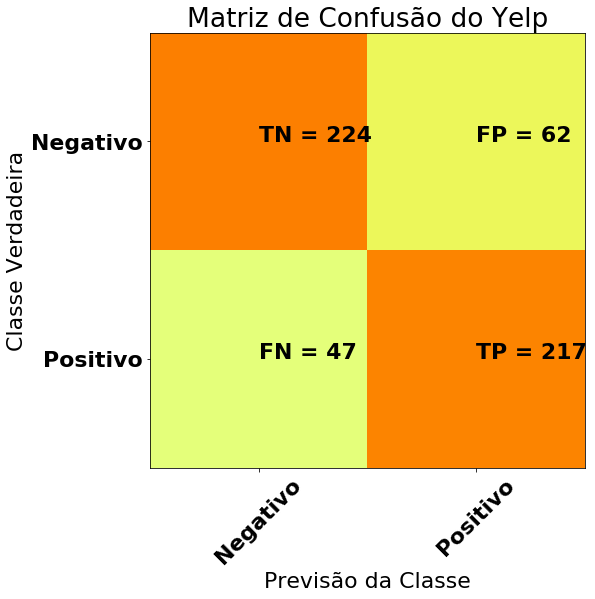

In [91]:
# Caracteristicas das fotes

font = {
    'family' : 'normal',
    'weight' : 'bold',
    'size' : 22}

plt.rc('font', **font)

cm = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negativo','Positivo']
plt.title('Matriz de Confusão do Yelp')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Previsão da Classe')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN','TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+' = ' + str(cm[i][j]))

plt.show()

# OBRIGADO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 